In [38]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib 

In [2]:
# データセットの用意

file_path = '.../dataset/nishika/old_apartment_2020/train/01.csv'

train = pd.DataFrame()

files = glob.glob("/tmp/working/dataset/nishika/old_apartment_2020/train/*")

# trainデータ読み込み
for i, file in enumerate(files):
    df = pd.read_csv(file)
    train = pd.concat([train, df], axis=0)

# testデータ読み込み
test = pd.read_csv('/tmp/working/dataset/nishika/old_apartment_2020/test.csv')


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# 前処理

train = train.drop(["種類", "地域"], axis=1)
test = test.drop(["種類", "地域"], axis=1)

In [6]:
print("train.shape : " + str(train.shape) )
print("test.shape : " + str(test.shape) )

train.shape : (651975, 26)
test.shape : (17894, 25)


In [7]:
train.head()

,ID,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,土地の形状,間口,延床面積（㎡）,建築年,建物の構造,用途,今後の利用目的,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log
0,1117225,1213,北海道,苫小牧市,新中野町,苫小牧,25,３ＬＤＫ,120,NaN,NaN,NaN,平成21年,ＲＣ,住宅,住宅,NaN,NaN,NaN,準工業地域,60.0,200.0,2018年第３四半期,未改装,NaN,7.431364
1,1001180,1101,北海道,札幌市中央区,北２条西,西２８丁目,8,４ＬＤＫ,150,NaN,NaN,NaN,平成14年,ＳＲＣ,NaN,住宅,NaN,NaN,NaN,近隣商業地域,80.0,300.0,2018年第３四半期,未改装,NaN,7.568202
2,1099061,1207,北海道,帯広市,西３条南,帯広,2,２ＬＤＫ,80,NaN,NaN,NaN,平成14年,ＲＣ,住宅,住宅,NaN,NaN,NaN,商業地域,80.0,500.0,2016年第２四半期,未改装,NaN,7.204120
3,1039968,1105,北海道,札幌市豊平区,平岸２条,南平岸,6,３ＬＤＫ,90,NaN,NaN,NaN,平成9年,NaN,住宅,住宅,NaN,NaN,NaN,近隣商業地域,80.0,300.0,2018年第４四半期,改装済,NaN,7.447158
4,1072923,1202,北海道,函館市,梁川町,五稜郭,30分?60分,２ＬＤＫ,70,NaN,NaN,NaN,平成24年,ＲＣ,住宅,住宅,NaN,NaN,NaN,商業地域,80.0,400.0,2015年第１四半期,未改装,NaN,7.322219


In [8]:
test.head()

,ID,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,土地の形状,間口,延床面積（㎡）,建築年,建物の構造,用途,今後の利用目的,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等
0,1000000,1101,北海道,札幌市中央区,旭ケ丘,円山公園,26,３ＬＤＫ,75,NaN,NaN,NaN,昭和64年,ＲＣ,NaN,住宅,NaN,NaN,NaN,第１種低層住居専用地域,40.0,60.0,2020年第２四半期,未改装,NaN
1,1000110,1101,北海道,札幌市中央区,大通西,西１８丁目,2,１ＬＤＫ,45,NaN,NaN,NaN,平成3年,ＳＲＣ,住宅,その他,NaN,NaN,NaN,商業地域,80.0,400.0,2020年第３四半期,未改装,NaN
2,1000111,1101,北海道,札幌市中央区,大通西,西１８丁目,2,２ＬＤＫ,50,NaN,NaN,NaN,昭和64年,ＳＲＣ,住宅,住宅,NaN,NaN,NaN,商業地域,80.0,400.0,2020年第３四半期,改装済,NaN
3,1000112,1101,北海道,札幌市中央区,大通西,西１８丁目,3,２ＬＤＫ,80,NaN,NaN,NaN,平成9年,ＲＣ,NaN,住宅,NaN,NaN,NaN,商業地域,80.0,400.0,2020年第３四半期,改装済,NaN
4,1000113,1101,北海道,札幌市中央区,大通西,西１８丁目,3,１Ｋ,20,NaN,NaN,NaN,昭和56年,ＲＣ,NaN,住宅,NaN,NaN,NaN,商業地域,80.0,400.0,2020年第３四半期,未改装,NaN


In [9]:
# 欠損値の確認
print(train.isnull().sum())

ID                   0
市区町村コード              0
都道府県名                0
市区町村名                0
地区名                657
最寄駅：名称            2633
最寄駅：距離（分）        23059
間取り              22429
面積（㎡）                0
土地の形状           651975
間口              651975
延床面積（㎡）         651975
建築年              18695
建物の構造            14877
用途               50642
今後の利用目的         363027
前面道路：方位         651975
前面道路：種類         651975
前面道路：幅員（ｍ）      651975
都市計画             18813
建ぺい率（％）          22807
容積率（％）           22807
取引時点                 0
改装               58674
取引の事情等          633578
取引価格（総額）_log         0
dtype: int64


In [10]:
print(test.isnull().sum())

ID                0
市区町村コード           0
都道府県名             0
市区町村名             0
地区名               3
最寄駅：名称           23
最寄駅：距離（分）        23
間取り             812
面積（㎡）             0
土地の形状         17894
間口            17894
延床面積（㎡）       17894
建築年             607
建物の構造          1118
用途             5370
今後の利用目的         795
前面道路：方位       17894
前面道路：種類       17894
前面道路：幅員（ｍ）    17894
都市計画            277
建ぺい率（％）         365
容積率（％）          365
取引時点              0
改装             2267
取引の事情等        17801
dtype: int64


In [11]:
# 種類
# 欠損なし
# すべてアパートなのでカラム削除

# print(train["種類"].value_counts())
# print(test["種類"].value_counts())

In [12]:
# 地域

# 地域の種類
# 地域はすべてがnullなので削除
# print(train["地域"].value_counts())

In [30]:
# 市区町村コード
# 618種類


# print(train["市区町村コード"].value_counts())
# print(len(train["市区町村コード"].unique().tolist()))
df = train[~train.duplicated(subset='市区町村コード')][["都道府県名", "市区町村名", "市区町村コード"]].reset_index(drop=True)

In [31]:
df[df["都道府県名"] == "北海道"]

,都道府県名,市区町村名,市区町村コード
0,北海道,苫小牧市,1213
1,北海道,札幌市中央区,1101
2,北海道,帯広市,1207
3,北海道,札幌市豊平区,1105
4,北海道,函館市,1202
5,北海道,札幌市北区,1102
6,北海道,札幌市手稲区,1109
7,北海道,札幌市西区,1107
8,北海道,旭川市,1204
9,北海道,小樽市,1203


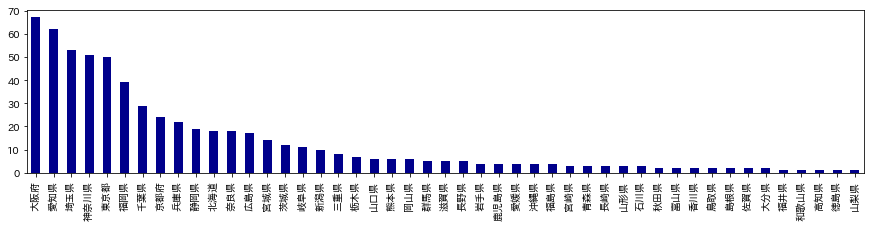

In [39]:
df["都道府県名"].value_counts().plot.bar(figsize=(15, 3), color='darkblue')